In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [6]:
# Load dataset
df = pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Missing values per column:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Basic statistics:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


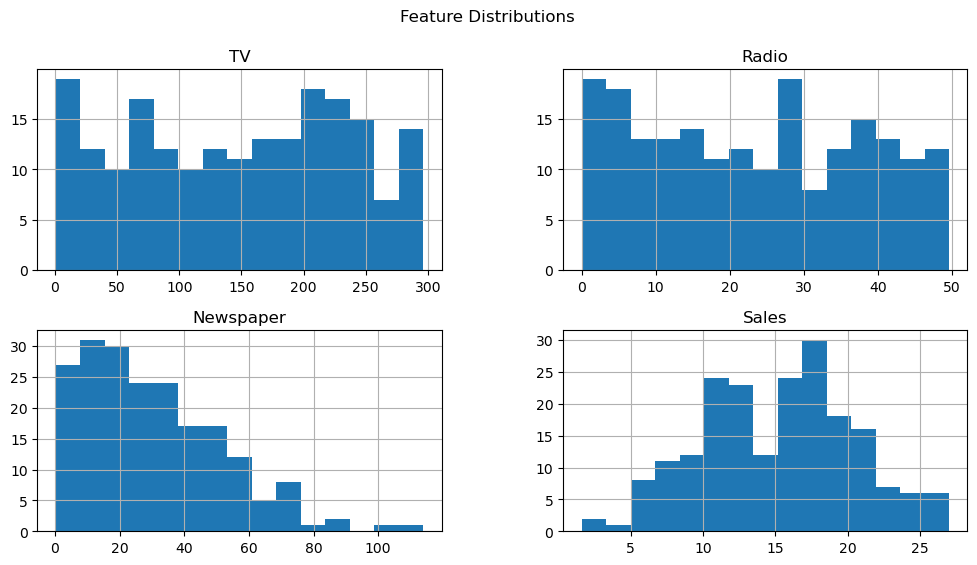

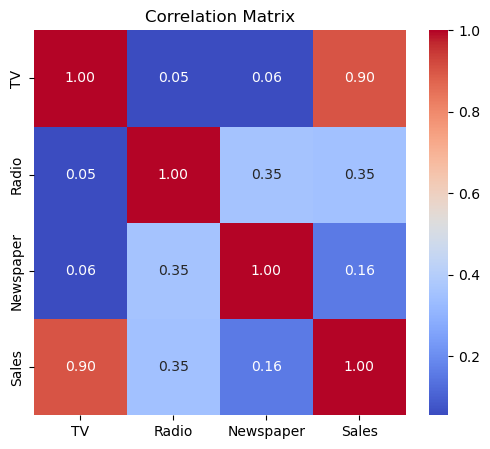

In [7]:
# Load dataset
df = pd.read_csv("Advertising.csv")

# 1. Data Preprocessing
print("Missing values per column:\n", df.isnull().sum())
print("\nBasic statistics:\n", df.describe())

# Visualize distributions
df.hist(bins=15, figsize=(12,6))
plt.suptitle("Feature Distributions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



=== Train:Test = 80%:20% ===
Split sizes - Train: 160, Test: 40
Simple LR (TV only) Metrics:
R² = 0.8026, MSE = 6.1011, MAE = 1.9503


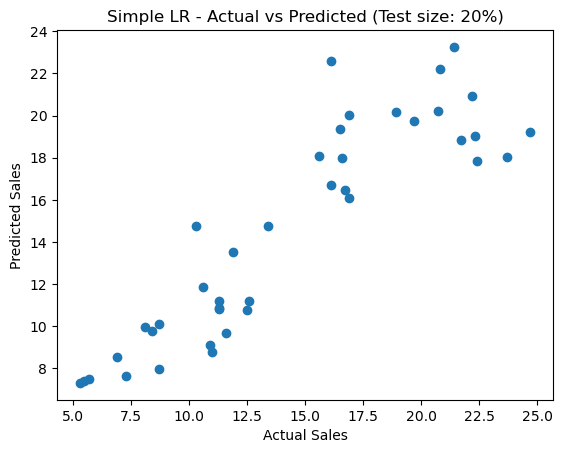

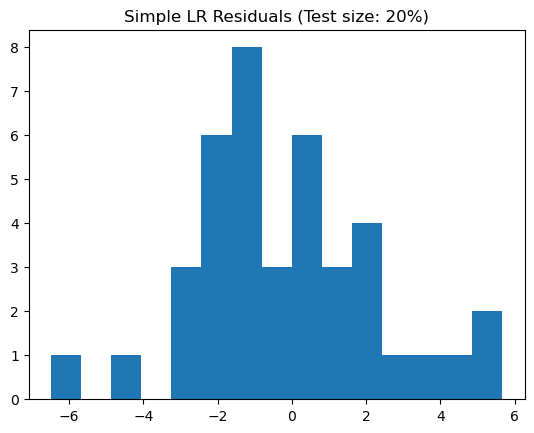

Multiple LR (TV, Radio, Newspaper) Metrics:
R² = 0.9059, MSE = 2.9078, MAE = 1.2748


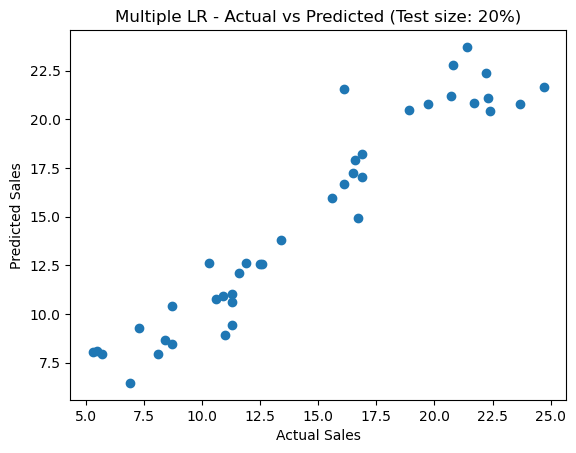

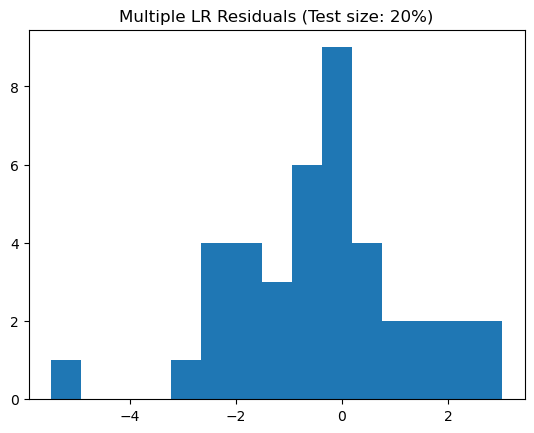


=== Train:Test = 70%:30% ===
Split sizes - Train: 140, Test: 60
Simple LR (TV only) Metrics:
R² = 0.8149, MSE = 5.1795, MAE = 1.8069


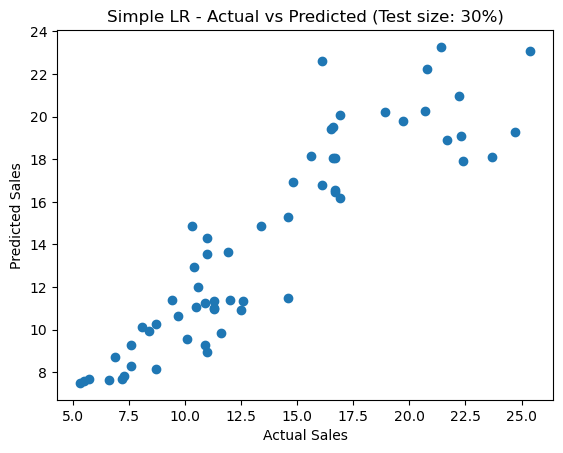

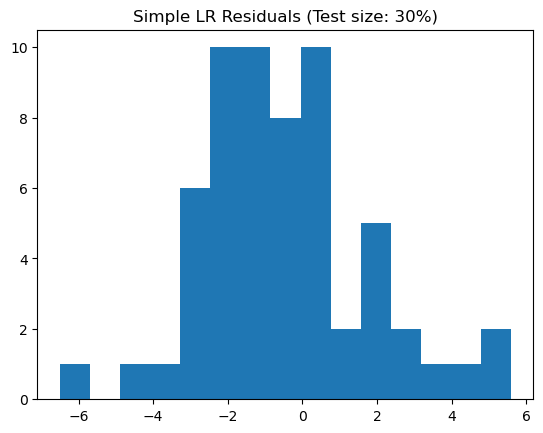

Multiple LR (TV, Radio, Newspaper) Metrics:
R² = 0.9091, MSE = 2.5416, MAE = 1.1595


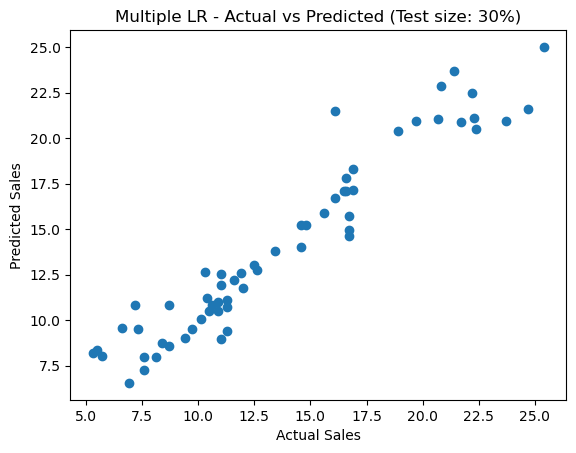

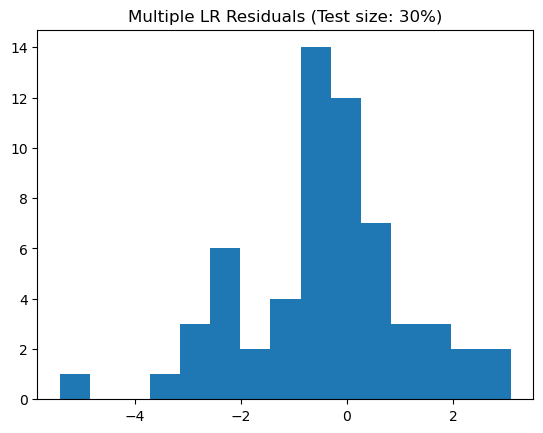


=== Train:Test = 60%:40% ===
Split sizes - Train: 120, Test: 80
Simple LR (TV only) Metrics:
R² = 0.8126, MSE = 5.1656, MAE = 1.8178


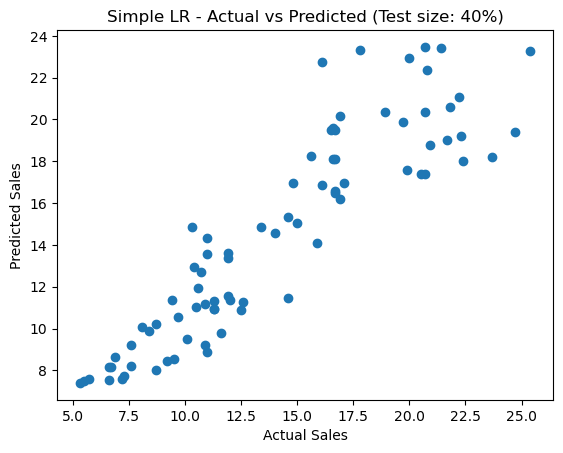

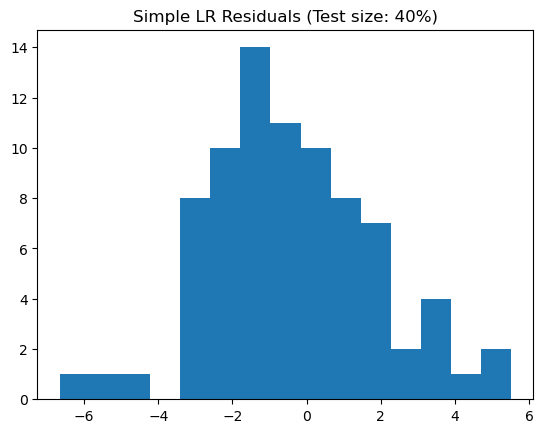

Multiple LR (TV, Radio, Newspaper) Metrics:
R² = 0.9016, MSE = 2.7133, MAE = 1.2288


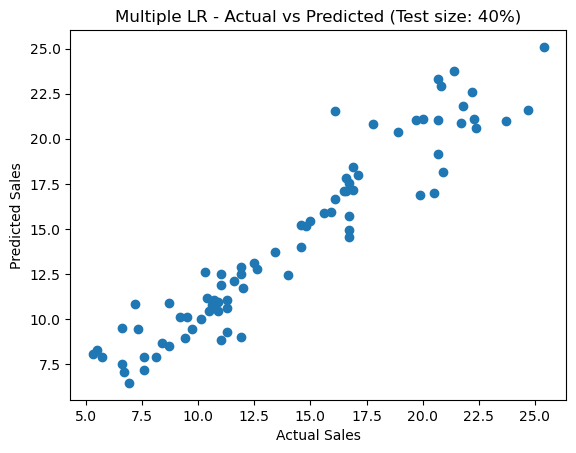

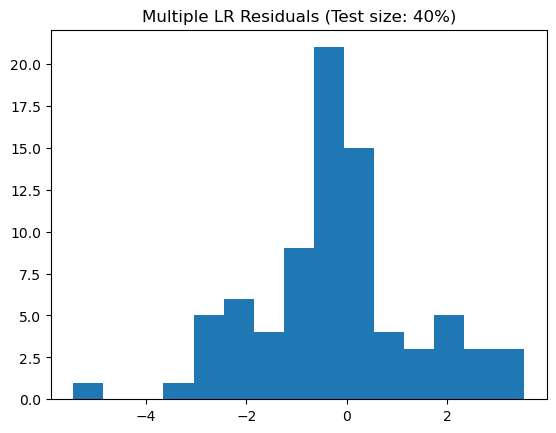

In [8]:
# Splits to test
splits = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Store results for conclusion
results = []

for train_size, test_size in splits:
    print(f"\n=== Train:Test = {int(train_size*100)}%:{int(test_size*100)}% ===")

    # Simple Linear Regression (TV only)
    X_simple = df[['TV']]
    y = df['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=test_size, random_state=42)
    print(f"Split sizes - Train: {len(X_train)}, Test: {len(X_test)}")

    model_simple = LinearRegression().fit(X_train, y_train)
    y_pred_simple = model_simple.predict(X_test)

    r2_simple = r2_score(y_test, y_pred_simple)
    mse_simple = mean_squared_error(y_test, y_pred_simple)
    mae_simple = mean_absolute_error(y_test, y_pred_simple)

    print("Simple LR (TV only) Metrics:")
    print(f"R² = {r2_simple:.4f}, MSE = {mse_simple:.4f}, MAE = {mae_simple:.4f}")

    plt.scatter(y_test, y_pred_simple)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"Simple LR - Actual vs Predicted (Test size: {int(test_size*100)}%)")
    plt.show()

    residuals_simple = y_test - y_pred_simple
    plt.hist(residuals_simple, bins=15)
    plt.title(f"Simple LR Residuals (Test size: {int(test_size*100)}%)")
    plt.show()

    # Multiple Linear Regression (TV, Radio, Newspaper)
    X_multi = df[['TV', 'Radio', 'Newspaper']]
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=test_size, random_state=42)

    model_multi = LinearRegression().fit(X_train_m, y_train_m)
    y_pred_multi = model_multi.predict(X_test_m)

    r2_multi = r2_score(y_test_m, y_pred_multi)
    mse_multi = mean_squared_error(y_test_m, y_pred_multi)
    mae_multi = mean_absolute_error(y_test_m, y_pred_multi)

    print("Multiple LR (TV, Radio, Newspaper) Metrics:")
    print(f"R² = {r2_multi:.4f}, MSE = {mse_multi:.4f}, MAE = {mae_multi:.4f}")

    plt.scatter(y_test_m, y_pred_multi)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"Multiple LR - Actual vs Predicted (Test size: {int(test_size*100)}%)")
    plt.show()

    residuals_multi = y_test_m - y_pred_multi
    plt.hist(residuals_multi, bins=15)
    plt.title(f"Multiple LR Residuals (Test size: {int(test_size*100)}%)")
    plt.show()

    # Save for conclusion
    results.append({
        'split': f"{int(train_size*100)}:{int(test_size*100)}",
        'r2_simple': r2_simple, 'mse_simple': mse_simple, 'mae_simple': mae_simple,
        'r2_multi': r2_multi, 'mse_multi': mse_multi, 'mae_multi': mae_multi
    })


In [9]:
# Final conclusion
print("\n--- Conclusion ---")
for res in results:
    print(f"\nTrain:Test = {res['split']}")
    print(f"Simple LR -> R²: {res['r2_simple']:.4f}, MSE: {res['mse_simple']:.4f}, MAE: {res['mae_simple']:.4f}")
    print(f"Multiple LR -> R²: {res['r2_multi']:.4f}, MSE: {res['mse_multi']:.4f}, MAE: {res['mae_multi']:.4f}")

print("""
Overall, the multiple linear regression model consistently outperforms the simple linear regression model across all train-test splits, exhibiting higher R² values and lower error metrics (MSE, MAE). The performance improves slightly as the training set size increases (80% train), due to more data availability. Residual histograms show relatively symmetric errors for both models, indicating good fits. This demonstrates the benefit of including multiple advertising channels (Radio and Newspaper) alongside TV spend in predicting Sales.
""")


--- Conclusion ---

Train:Test = 80:20
Simple LR -> R²: 0.8026, MSE: 6.1011, MAE: 1.9503
Multiple LR -> R²: 0.9059, MSE: 2.9078, MAE: 1.2748

Train:Test = 70:30
Simple LR -> R²: 0.8149, MSE: 5.1795, MAE: 1.8069
Multiple LR -> R²: 0.9091, MSE: 2.5416, MAE: 1.1595

Train:Test = 60:40
Simple LR -> R²: 0.8126, MSE: 5.1656, MAE: 1.8178
Multiple LR -> R²: 0.9016, MSE: 2.7133, MAE: 1.2288

Overall, the multiple linear regression model consistently outperforms the simple linear regression model across all train-test splits, exhibiting higher R² values and lower error metrics (MSE, MAE). The performance improves slightly as the training set size increases (80% train), due to more data availability. Residual histograms show relatively symmetric errors for both models, indicating good fits. This demonstrates the benefit of including multiple advertising channels (Radio and Newspaper) alongside TV spend in predicting Sales.

